# Single Training

## Optimized Hyperparameters

| hyperparameter|FP|AIT|FLVL|FLVU|HCOM|
|--------------:|-:|--:|---:|---:|---:|
| hidden_size | 64 | 128 | 256 | 512 | 256 |
| dropout | 0.279 | 0.298 | 0.238 | 0.268 | 0.276 |
| num_layers | 3 | 3 | 4 | 6 | 7 |
| num_timesteps | 5 | 8 | 5 | 6 | 4 |
| lr_init | 0.01 | 0.001 | 0.0001 | 0.0001 | 0.0001 |
| gamma | 0.978 | 0.982 | 0.979 | 0.979 | 0.986 |
| weight_decay | 3.82 $\times$ 10$^{-3}$ | 2.37 $\times$ 10$^{-4}$ | 1.39 $\times$ 10$^{-2}$ | 6.36 $\times$ 10$^{-2}$ | 6.72 $\times$ 10$^{-3}$ |

## Optimized Hyperparameters - Toxicity

| hyperparameter|MOUSE_INTRAPERITONEAL_LDLo|IGC50|LC50|
|--------------:|-------------------------:|----:|---:|
| hidden_size |256|512|64|
| dropout |0.254|0.265|0.326|
| num_layers | 8 | 7 |4|
| num_timesteps | 9 | 9 |2|
| lr_init | 0.001 | 0.001 |0.01|
| gamma | 0.978 | 0.987 |0.982|
| weight_decay | 1.00 $\times$ 10$^{-2}$ | 2.73 $\times$ 10^${-2}$ | 7.41 $\times$ 10^${-4}$|

In [1]:
optimized = {
    'FP' : {'hidden_size' : 64, 'dropout' : 0.279, 'num_layers' : 3, 'num_timesteps' : 5, 'lr_init' : 0.01, 'gamma' : 0.978, 'weight_decay' : 3.82E-3},
    'AIT' : {'hidden_size' : 128, 'dropout' : 0.298, 'num_layers' : 3, 'num_timesteps' : 8, 'lr_init' : 0.001, 'gamma' : 0.982, 'weight_decay' : 2.37E-4},
    'HCOM' : {'hidden_size' : 256, 'dropout' : 0.276, 'num_layers' : 7, 'num_timesteps' : 4, 'lr_init' : 0.0001, 'gamma' : 0.986, 'weight_decay' : 6.72E-3},
    'FLVL' : {'hidden_size' : 256, 'dropout' : 0.238, 'num_layers' : 4, 'num_timesteps' : 5, 'lr_init' : 0.0001, 'gamma' : 0.979, 'weight_decay' : 1.39E-2},
    'FLVU' : {'hidden_size' : 512, 'dropout' : 0.268, 'num_layers' : 6, 'num_timesteps' : 6, 'lr_init' : 0.0001, 'gamma' : 0.979, 'weight_decay' : 6.36E-3},
    
    'MOUSE_INTRAPERITONEAL_LDLo' : {'hidden_size' : 256, 'dropout' : 0.254, 'num_layers' : 8, 'num_timesteps' : 9, 'lr_init' : 0.001, 'gamma' : 0.978, 'weight_decay' : 1.00E-2},
    'RAT_INTRAPERITONEAL_LD50' : {'hidden_size' : 256, 'dropout' : 0.254, 'num_layers' : 8, 'num_timesteps' : 9, 'lr_init' : 0.001, 'gamma' : 0.978, 'weight_decay' : 1.00E-2},
    'IGC50' : {'hidden_size' : 512, 'dropout' : 0.265, 'num_layers' : 7, 'num_timesteps' : 9, 'lr_init' : 0.001, 'gamma' : 0.987, 'weight_decay' : 2.73E-2},
    'LC50' : {'hidden_size' : 64, 'dropout' : 0.326, 'num_layers' : 4, 'num_timesteps' : 2, 'lr_init' : 0.01, 'gamma' : 0.982, 'weight_decay' : 7.41E-4},
}

## Hyperparameter Setting

In [10]:
parameters = dict(
    subfrag_size = 12,
    edge_size = 3,
    out_size = 1,
    seed = 42,
    batch_size = 128,
    max_epoch = 200,
    verbose = True,
    save = False,
    
    target = 'RAT_INTRAPERITONEAL_LD50',
)
parameters = parameters | optimized[parameters['target']]
DATAPATH = "/SSD2/bgkang/Chemomile"

KeyError: 'RAT_INTRAPERITONEAL_LD50'

## Dataset

In [3]:
import sys
sys.path.append(DATAPATH)
from src.data import Dataset

dataset = Dataset(
    target = parameters['target'],
    seed = parameters['seed'],
    batch_size = parameters['batch_size'],
    verbose = parameters['verbose'],
    root = DATAPATH
)

	DataDump found for 'LC50'. Loading dumped data.
Training : 655 | Validation : 82 | Test : 82
Total : 819


## Model Define

In [4]:
from src.model import Chemomile

model = Chemomile(
    subfrag_size = parameters['subfrag_size'],
    hidden_size = parameters['hidden_size'],
    edge_size = parameters['edge_size'],
    out_size = parameters['out_size'],
    dropout = parameters['dropout'],
    num_layers = parameters['num_layers'],
    num_timesteps = parameters['num_timesteps'],
)

In [5]:
from src.train import Training

train = Training(
    model = model,
    parameters = parameters,
    dataset = dataset,
    root = "/SSD2/bgkang/Chemomile/Model",
)

## Training

In [6]:
train.run()

Output()

| Epoch :    0 | Trn. Loss : 1.037e+00 | Val. Loss : 2.889e+00 | LR : 1.000e-02 |

| Epoch :    1 | Trn. Loss : 8.002e-01 | Val. Loss : 2.942e+00 | LR : 9.820e-03 |

| Epoch :    2 | Trn. Loss : 7.160e-01 | Val. Loss : 6.631e-01 | LR : 9.643e-03 |

| Epoch :    3 | Trn. Loss : 6.882e-01 | Val. Loss : 4.143e-01 | LR : 9.470e-03 |

| Epoch :    4 | Trn. Loss : 6.696e-01 | Val. Loss : 4.411e-01 | LR : 9.299e-03 |

| Epoch :    5 | Trn. Loss : 6.336e-01 | Val. Loss : 3.782e-01 | LR : 9.132e-03 |

| Epoch :    6 | Trn. Loss : 6.161e-01 | Val. Loss : 4.210e-01 | LR : 8.967e-03 |

| Epoch :    7 | Trn. Loss : 5.646e-01 | Val. Loss : 3.735e-01 | LR : 8.806e-03 |

| Epoch :    8 | Trn. Loss : 5.717e-01 | Val. Loss : 3.680e-01 | LR : 8.648e-03 |

| Epoch :    9 | Trn. Loss : 6.171e-01 | Val. Loss : 3.893e-01 | LR : 8.492e-03 |

| Epoch :   10 | Trn. Loss : 5.722e-01 | Val. Loss : 3.761e-01 | LR : 8.339e-03 |

| Epoch :   11 | Trn. Loss : 5.447e-01 | Val. Loss : 3.882e-01 | LR : 8.189e-03 |

| Epoch :   12 | Trn. Loss : 5.779e-01 | Val. Loss : 4.405e-01 | LR : 8.042e-03 |

| Epoch :   13 | Trn. Loss : 5.332e-01 | Val. Loss : 4.319e-01 | LR : 7.897e-03 |

| Epoch :   14 | Trn. Loss : 5.365e-01 | Val. Loss : 4.068e-01 | LR : 7.755e-03 |

| Epoch :   15 | Trn. Loss : 5.328e-01 | Val. Loss : 4.446e-01 | LR : 7.615e-03 |

| Epoch :   16 | Trn. Loss : 5.645e-01 | Val. Loss : 5.691e-01 | LR : 7.478e-03 |

| Epoch :   17 | Trn. Loss : 5.520e-01 | Val. Loss : 4.626e-01 | LR : 7.343e-03 |

| Epoch :   18 | Trn. Loss : 5.458e-01 | Val. Loss : 4.934e-01 | LR : 7.211e-03 |

| Epoch :   19 | Trn. Loss : 5.701e-01 | Val. Loss : 6.773e-01 | LR : 7.081e-03 |

| Epoch :   20 | Trn. Loss : 5.452e-01 | Val. Loss : 3.295e-01 | LR : 6.954e-03 |

| Epoch :   21 | Trn. Loss : 5.521e-01 | Val. Loss : 4.568e-01 | LR : 6.829e-03 |

| Epoch :   22 | Trn. Loss : 5.315e-01 | Val. Loss : 5.475e-01 | LR : 6.706e-03 |

| Epoch :   23 | Trn. Loss : 5.346e-01 | Val. Loss : 3.809e-01 | LR : 6.585e-03 |

| Epoch :   24 | Trn. Loss : 5.269e-01 | Val. Loss : 3.946e-01 | LR : 6.467e-03 |

| Epoch :   25 | Trn. Loss : 5.089e-01 | Val. Loss : 3.860e-01 | LR : 6.350e-03 |

| Epoch :   26 | Trn. Loss : 5.229e-01 | Val. Loss : 4.955e-01 | LR : 6.236e-03 |

| Epoch :   27 | Trn. Loss : 5.484e-01 | Val. Loss : 4.133e-01 | LR : 6.124e-03 |

| Epoch :   28 | Trn. Loss : 4.982e-01 | Val. Loss : 3.662e-01 | LR : 6.013e-03 |

| Epoch :   29 | Trn. Loss : 5.685e-01 | Val. Loss : 3.610e-01 | LR : 5.905e-03 |

| Epoch :   30 | Trn. Loss : 5.060e-01 | Val. Loss : 5.259e-01 | LR : 5.799e-03 |

| Epoch :   31 | Trn. Loss : 5.042e-01 | Val. Loss : 3.424e-01 | LR : 5.695e-03 |

| Epoch :   32 | Trn. Loss : 5.014e-01 | Val. Loss : 3.448e-01 | LR : 5.592e-03 |

| Epoch :   33 | Trn. Loss : 4.810e-01 | Val. Loss : 3.986e-01 | LR : 5.491e-03 |

| Epoch :   34 | Trn. Loss : 4.829e-01 | Val. Loss : 3.611e-01 | LR : 5.393e-03 |

| Epoch :   35 | Trn. Loss : 4.738e-01 | Val. Loss : 5.974e-01 | LR : 5.295e-03 |

| Epoch :   36 | Trn. Loss : 4.927e-01 | Val. Loss : 4.719e-01 | LR : 5.200e-03 |

| Epoch :   37 | Trn. Loss : 4.813e-01 | Val. Loss : 4.705e-01 | LR : 5.107e-03 |

| Epoch :   38 | Trn. Loss : 4.628e-01 | Val. Loss : 4.556e-01 | LR : 5.015e-03 |

| Epoch :   39 | Trn. Loss : 4.935e-01 | Val. Loss : 3.286e-01 | LR : 4.924e-03 |

| Epoch :   40 | Trn. Loss : 4.766e-01 | Val. Loss : 4.340e-01 | LR : 4.836e-03 |

| Epoch :   41 | Trn. Loss : 4.684e-01 | Val. Loss : 3.401e-01 | LR : 4.749e-03 |

| Epoch :   42 | Trn. Loss : 4.616e-01 | Val. Loss : 3.706e-01 | LR : 4.663e-03 |

| Epoch :   43 | Trn. Loss : 4.483e-01 | Val. Loss : 3.553e-01 | LR : 4.579e-03 |

| Epoch :   44 | Trn. Loss : 4.506e-01 | Val. Loss : 3.929e-01 | LR : 4.497e-03 |

| Epoch :   45 | Trn. Loss : 4.472e-01 | Val. Loss : 3.635e-01 | LR : 4.416e-03 |

| Epoch :   46 | Trn. Loss : 4.586e-01 | Val. Loss : 3.359e-01 | LR : 4.336e-03 |

| Epoch :   47 | Trn. Loss : 4.435e-01 | Val. Loss : 4.197e-01 | LR : 4.258e-03 |

| Epoch :   48 | Trn. Loss : 4.543e-01 | Val. Loss : 4.995e-01 | LR : 4.182e-03 |

| Epoch :   49 | Trn. Loss : 4.543e-01 | Val. Loss : 3.671e-01 | LR : 4.106e-03 |

| Epoch :   50 | Trn. Loss : 4.417e-01 | Val. Loss : 3.550e-01 | LR : 4.033e-03 |

| Epoch :   51 | Trn. Loss : 4.401e-01 | Val. Loss : 3.270e-01 | LR : 3.960e-03 |

| Epoch :   52 | Trn. Loss : 4.132e-01 | Val. Loss : 5.405e-01 | LR : 3.889e-03 |

| Epoch :   53 | Trn. Loss : 4.706e-01 | Val. Loss : 4.083e-01 | LR : 3.819e-03 |

| Epoch :   54 | Trn. Loss : 4.400e-01 | Val. Loss : 5.821e-01 | LR : 3.750e-03 |

| Epoch :   55 | Trn. Loss : 4.551e-01 | Val. Loss : 3.972e-01 | LR : 3.682e-03 |

| Epoch :   56 | Trn. Loss : 4.337e-01 | Val. Loss : 4.832e-01 | LR : 3.616e-03 |

| Epoch :   57 | Trn. Loss : 4.287e-01 | Val. Loss : 3.468e-01 | LR : 3.551e-03 |

| Epoch :   58 | Trn. Loss : 4.469e-01 | Val. Loss : 4.107e-01 | LR : 3.487e-03 |

| Epoch :   59 | Trn. Loss : 4.166e-01 | Val. Loss : 5.295e-01 | LR : 3.424e-03 |

| Epoch :   60 | Trn. Loss : 4.159e-01 | Val. Loss : 3.033e-01 | LR : 3.363e-03 |

| Epoch :   61 | Trn. Loss : 4.227e-01 | Val. Loss : 3.489e-01 | LR : 3.302e-03 |

| Epoch :   62 | Trn. Loss : 4.117e-01 | Val. Loss : 4.603e-01 | LR : 3.243e-03 |

| Epoch :   63 | Trn. Loss : 4.094e-01 | Val. Loss : 3.342e-01 | LR : 3.184e-03 |

| Epoch :   64 | Trn. Loss : 4.037e-01 | Val. Loss : 4.055e-01 | LR : 3.127e-03 |

| Epoch :   65 | Trn. Loss : 3.788e-01 | Val. Loss : 3.830e-01 | LR : 3.071e-03 |

| Epoch :   66 | Trn. Loss : 3.986e-01 | Val. Loss : 3.654e-01 | LR : 3.015e-03 |

| Epoch :   67 | Trn. Loss : 3.990e-01 | Val. Loss : 6.768e-01 | LR : 2.961e-03 |

| Epoch :   68 | Trn. Loss : 3.830e-01 | Val. Loss : 3.845e-01 | LR : 2.908e-03 |

| Epoch :   69 | Trn. Loss : 3.989e-01 | Val. Loss : 5.295e-01 | LR : 2.856e-03 |

| Epoch :   70 | Trn. Loss : 4.097e-01 | Val. Loss : 1.142e+00 | LR : 2.804e-03 |

| Epoch :   71 | Trn. Loss : 4.012e-01 | Val. Loss : 3.746e-01 | LR : 2.754e-03 |

| Epoch :   72 | Trn. Loss : 3.822e-01 | Val. Loss : 4.910e-01 | LR : 2.704e-03 |

| Epoch :   73 | Trn. Loss : 3.854e-01 | Val. Loss : 6.336e-01 | LR : 2.655e-03 |

| Epoch :   74 | Trn. Loss : 3.593e-01 | Val. Loss : 3.512e-01 | LR : 2.608e-03 |

| Epoch :   75 | Trn. Loss : 3.749e-01 | Val. Loss : 4.849e-01 | LR : 2.561e-03 |

| Epoch :   76 | Trn. Loss : 3.737e-01 | Val. Loss : 7.959e-01 | LR : 2.515e-03 |

| Epoch :   77 | Trn. Loss : 3.597e-01 | Val. Loss : 3.831e-01 | LR : 2.469e-03 |

| Epoch :   78 | Trn. Loss : 3.529e-01 | Val. Loss : 6.608e-01 | LR : 2.425e-03 |

| Epoch :   79 | Trn. Loss : 3.550e-01 | Val. Loss : 6.398e-01 | LR : 2.381e-03 |

| Epoch :   80 | Trn. Loss : 3.466e-01 | Val. Loss : 6.049e-01 | LR : 2.338e-03 |

| Epoch :   81 | Trn. Loss : 3.431e-01 | Val. Loss : 4.172e-01 | LR : 2.296e-03 |

| Epoch :   82 | Trn. Loss : 3.436e-01 | Val. Loss : 1.164e+00 | LR : 2.255e-03 |

| Epoch :   83 | Trn. Loss : 3.515e-01 | Val. Loss : 6.032e-01 | LR : 2.214e-03 |

| Epoch :   84 | Trn. Loss : 3.342e-01 | Val. Loss : 5.282e-01 | LR : 2.175e-03 |

| Epoch :   85 | Trn. Loss : 3.523e-01 | Val. Loss : 3.171e-01 | LR : 2.135e-03 |

| Epoch :   86 | Trn. Loss : 3.538e-01 | Val. Loss : 1.030e+00 | LR : 2.097e-03 |

| Epoch :   87 | Trn. Loss : 3.539e-01 | Val. Loss : 6.257e-01 | LR : 2.059e-03 |

| Epoch :   88 | Trn. Loss : 3.420e-01 | Val. Loss : 6.170e-01 | LR : 2.022e-03 |

| Epoch :   89 | Trn. Loss : 3.247e-01 | Val. Loss : 6.921e-01 | LR : 1.986e-03 |

| Epoch :   90 | Trn. Loss : 3.443e-01 | Val. Loss : 6.120e-01 | LR : 1.950e-03 |

| Epoch :   91 | Trn. Loss : 3.246e-01 | Val. Loss : 5.087e-01 | LR : 1.915e-03 |

| Epoch :   92 | Trn. Loss : 3.388e-01 | Val. Loss : 8.366e-01 | LR : 1.880e-03 |

| Epoch :   93 | Trn. Loss : 3.430e-01 | Val. Loss : 6.367e-01 | LR : 1.847e-03 |

| Epoch :   94 | Trn. Loss : 3.061e-01 | Val. Loss : 1.492e+00 | LR : 1.813e-03 |

| Epoch :   95 | Trn. Loss : 3.351e-01 | Val. Loss : 1.065e+00 | LR : 1.781e-03 |

| Epoch :   96 | Trn. Loss : 3.257e-01 | Val. Loss : 4.050e-01 | LR : 1.749e-03 |

| Epoch :   97 | Trn. Loss : 3.175e-01 | Val. Loss : 1.809e+00 | LR : 1.717e-03 |

| Epoch :   98 | Trn. Loss : 3.463e-01 | Val. Loss : 5.207e-01 | LR : 1.686e-03 |

| Epoch :   99 | Trn. Loss : 3.234e-01 | Val. Loss : 7.048e-01 | LR : 1.656e-03 |

| Epoch :  100 | Trn. Loss : 3.216e-01 | Val. Loss : 4.863e-01 | LR : 1.626e-03 |

| Epoch :  101 | Trn. Loss : 3.002e-01 | Val. Loss : 1.036e+00 | LR : 1.597e-03 |

| Epoch :  102 | Trn. Loss : 2.944e-01 | Val. Loss : 7.960e-01 | LR : 1.568e-03 |

| Epoch :  103 | Trn. Loss : 3.006e-01 | Val. Loss : 8.416e-01 | LR : 1.540e-03 |

| Epoch :  104 | Trn. Loss : 2.966e-01 | Val. Loss : 1.041e+00 | LR : 1.512e-03 |

| Epoch :  105 | Trn. Loss : 3.045e-01 | Val. Loss : 8.817e-01 | LR : 1.485e-03 |

| Epoch :  106 | Trn. Loss : 2.964e-01 | Val. Loss : 1.477e+00 | LR : 1.458e-03 |

| Epoch :  107 | Trn. Loss : 2.984e-01 | Val. Loss : 4.005e-01 | LR : 1.432e-03 |

| Epoch :  108 | Trn. Loss : 2.852e-01 | Val. Loss : 1.042e+00 | LR : 1.406e-03 |

| Epoch :  109 | Trn. Loss : 3.005e-01 | Val. Loss : 8.308e-01 | LR : 1.381e-03 |

| Epoch :  110 | Trn. Loss : 2.838e-01 | Val. Loss : 6.550e-01 | LR : 1.356e-03 |

| Epoch :  111 | Trn. Loss : 2.911e-01 | Val. Loss : 1.327e+00 | LR : 1.332e-03 |

| Epoch :  112 | Trn. Loss : 2.800e-01 | Val. Loss : 6.568e-01 | LR : 1.308e-03 |

| Epoch :  113 | Trn. Loss : 3.108e-01 | Val. Loss : 1.009e+00 | LR : 1.284e-03 |

| Epoch :  114 | Trn. Loss : 2.954e-01 | Val. Loss : 8.047e-01 | LR : 1.261e-03 |

| Epoch :  115 | Trn. Loss : 2.700e-01 | Val. Loss : 8.490e-01 | LR : 1.238e-03 |

| Epoch :  116 | Trn. Loss : 2.739e-01 | Val. Loss : 9.787e-01 | LR : 1.216e-03 |

| Epoch :  117 | Trn. Loss : 2.926e-01 | Val. Loss : 6.462e-01 | LR : 1.194e-03 |

| Epoch :  118 | Trn. Loss : 2.799e-01 | Val. Loss : 1.186e+00 | LR : 1.173e-03 |

| Epoch :  119 | Trn. Loss : 2.719e-01 | Val. Loss : 8.726e-01 | LR : 1.152e-03 |

| Epoch :  120 | Trn. Loss : 2.713e-01 | Val. Loss : 7.148e-01 | LR : 1.131e-03 |

| Epoch :  121 | Trn. Loss : 2.734e-01 | Val. Loss : 1.361e+00 | LR : 1.110e-03 |

| Epoch :  122 | Trn. Loss : 2.739e-01 | Val. Loss : 8.937e-01 | LR : 1.090e-03 |

| Epoch :  123 | Trn. Loss : 2.811e-01 | Val. Loss : 1.181e+00 | LR : 1.071e-03 |

| Epoch :  124 | Trn. Loss : 2.759e-01 | Val. Loss : 6.092e-01 | LR : 1.052e-03 |

| Epoch :  125 | Trn. Loss : 2.629e-01 | Val. Loss : 1.115e+00 | LR : 1.033e-03 |

| Epoch :  126 | Trn. Loss : 2.662e-01 | Val. Loss : 7.952e-01 | LR : 1.014e-03 |

| Epoch :  127 | Trn. Loss : 2.698e-01 | Val. Loss : 1.072e+00 | LR : 9.958e-04 |

| Epoch :  128 | Trn. Loss : 2.687e-01 | Val. Loss : 6.873e-01 | LR : 9.778e-04 |

| Epoch :  129 | Trn. Loss : 2.709e-01 | Val. Loss : 6.594e-01 | LR : 9.602e-04 |

| Epoch :  130 | Trn. Loss : 2.669e-01 | Val. Loss : 8.175e-01 | LR : 9.430e-04 |

| Epoch :  131 | Trn. Loss : 2.576e-01 | Val. Loss : 1.263e+00 | LR : 9.260e-04 |

| Epoch :  132 | Trn. Loss : 2.785e-01 | Val. Loss : 7.853e-01 | LR : 9.093e-04 |

| Epoch :  133 | Trn. Loss : 2.553e-01 | Val. Loss : 1.496e+00 | LR : 8.930e-04 |

| Epoch :  134 | Trn. Loss : 2.655e-01 | Val. Loss : 1.065e+00 | LR : 8.769e-04 |

| Epoch :  135 | Trn. Loss : 2.687e-01 | Val. Loss : 1.131e+00 | LR : 8.611e-04 |

| Epoch :  136 | Trn. Loss : 2.596e-01 | Val. Loss : 1.005e+00 | LR : 8.456e-04 |

| Epoch :  137 | Trn. Loss : 2.630e-01 | Val. Loss : 1.232e+00 | LR : 8.304e-04 |

| Epoch :  138 | Trn. Loss : 2.553e-01 | Val. Loss : 9.536e-01 | LR : 8.154e-04 |

| Epoch :  139 | Trn. Loss : 2.594e-01 | Val. Loss : 7.960e-01 | LR : 8.007e-04 |

| Epoch :  140 | Trn. Loss : 2.533e-01 | Val. Loss : 7.858e-01 | LR : 7.863e-04 |

| Epoch :  141 | Trn. Loss : 2.508e-01 | Val. Loss : 9.215e-01 | LR : 7.722e-04 |

| Epoch :  142 | Trn. Loss : 2.564e-01 | Val. Loss : 8.539e-01 | LR : 7.583e-04 |

| Epoch :  143 | Trn. Loss : 2.391e-01 | Val. Loss : 8.199e-01 | LR : 7.446e-04 |

| Epoch :  144 | Trn. Loss : 2.315e-01 | Val. Loss : 6.834e-01 | LR : 7.312e-04 |

| Epoch :  145 | Trn. Loss : 2.486e-01 | Val. Loss : 1.264e+00 | LR : 7.181e-04 |

| Epoch :  146 | Trn. Loss : 2.406e-01 | Val. Loss : 1.321e+00 | LR : 7.051e-04 |

| Epoch :  147 | Trn. Loss : 2.447e-01 | Val. Loss : 9.644e-01 | LR : 6.925e-04 |

| Epoch :  148 | Trn. Loss : 2.408e-01 | Val. Loss : 9.482e-01 | LR : 6.800e-04 |

| Epoch :  149 | Trn. Loss : 2.361e-01 | Val. Loss : 9.144e-01 | LR : 6.677e-04 |

| Epoch :  150 | Trn. Loss : 2.497e-01 | Val. Loss : 5.522e-01 | LR : 6.557e-04 |

| Epoch :  151 | Trn. Loss : 2.376e-01 | Val. Loss : 1.700e+00 | LR : 6.439e-04 |

| Epoch :  152 | Trn. Loss : 2.463e-01 | Val. Loss : 5.940e-01 | LR : 6.323e-04 |

| Epoch :  153 | Trn. Loss : 2.414e-01 | Val. Loss : 1.476e+00 | LR : 6.210e-04 |

| Epoch :  154 | Trn. Loss : 2.435e-01 | Val. Loss : 8.672e-01 | LR : 6.098e-04 |

| Epoch :  155 | Trn. Loss : 2.471e-01 | Val. Loss : 1.052e+00 | LR : 5.988e-04 |

| Epoch :  156 | Trn. Loss : 2.369e-01 | Val. Loss : 8.791e-01 | LR : 5.880e-04 |

| Epoch :  157 | Trn. Loss : 2.340e-01 | Val. Loss : 8.072e-01 | LR : 5.774e-04 |

| Epoch :  158 | Trn. Loss : 2.375e-01 | Val. Loss : 9.511e-01 | LR : 5.670e-04 |

| Epoch :  159 | Trn. Loss : 2.404e-01 | Val. Loss : 1.268e+00 | LR : 5.568e-04 |

| Epoch :  160 | Trn. Loss : 2.368e-01 | Val. Loss : 1.246e+00 | LR : 5.468e-04 |

| Epoch :  161 | Trn. Loss : 2.424e-01 | Val. Loss : 6.898e-01 | LR : 5.370e-04 |

| Epoch :  162 | Trn. Loss : 2.338e-01 | Val. Loss : 1.005e+00 | LR : 5.273e-04 |

| Epoch :  163 | Trn. Loss : 2.210e-01 | Val. Loss : 9.968e-01 | LR : 5.178e-04 |

| Epoch :  164 | Trn. Loss : 2.271e-01 | Val. Loss : 6.100e-01 | LR : 5.085e-04 |

| Epoch :  165 | Trn. Loss : 2.441e-01 | Val. Loss : 9.522e-01 | LR : 4.993e-04 |

| Epoch :  166 | Trn. Loss : 2.344e-01 | Val. Loss : 1.295e+00 | LR : 4.904e-04 |

| Epoch :  167 | Trn. Loss : 2.288e-01 | Val. Loss : 7.645e-01 | LR : 4.815e-04 |

| Epoch :  168 | Trn. Loss : 2.257e-01 | Val. Loss : 1.157e+00 | LR : 4.729e-04 |

| Epoch :  169 | Trn. Loss : 2.167e-01 | Val. Loss : 9.433e-01 | LR : 4.643e-04 |

| Epoch :  170 | Trn. Loss : 2.315e-01 | Val. Loss : 1.017e+00 | LR : 4.560e-04 |

| Epoch :  171 | Trn. Loss : 2.177e-01 | Val. Loss : 1.127e+00 | LR : 4.478e-04 |

| Epoch :  172 | Trn. Loss : 2.383e-01 | Val. Loss : 9.753e-01 | LR : 4.397e-04 |

| Epoch :  173 | Trn. Loss : 2.203e-01 | Val. Loss : 9.565e-01 | LR : 4.318e-04 |

| Epoch :  174 | Trn. Loss : 2.223e-01 | Val. Loss : 9.196e-01 | LR : 4.240e-04 |

| Epoch :  175 | Trn. Loss : 2.284e-01 | Val. Loss : 1.243e+00 | LR : 4.164e-04 |

| Epoch :  176 | Trn. Loss : 2.175e-01 | Val. Loss : 7.638e-01 | LR : 4.089e-04 |

| Epoch :  177 | Trn. Loss : 2.148e-01 | Val. Loss : 1.277e+00 | LR : 4.015e-04 |

| Epoch :  178 | Trn. Loss : 2.237e-01 | Val. Loss : 1.558e+00 | LR : 3.943e-04 |

| Epoch :  179 | Trn. Loss : 2.160e-01 | Val. Loss : 7.749e-01 | LR : 3.872e-04 |

| Epoch :  180 | Trn. Loss : 2.182e-01 | Val. Loss : 1.140e+00 | LR : 3.802e-04 |

| Epoch :  181 | Trn. Loss : 2.292e-01 | Val. Loss : 8.476e-01 | LR : 3.734e-04 |

| Epoch :  182 | Trn. Loss : 2.227e-01 | Val. Loss : 9.318e-01 | LR : 3.667e-04 |

| Epoch :  183 | Trn. Loss : 2.119e-01 | Val. Loss : 1.095e+00 | LR : 3.601e-04 |

| Epoch :  184 | Trn. Loss : 2.140e-01 | Val. Loss : 8.986e-01 | LR : 3.536e-04 |

| Epoch :  185 | Trn. Loss : 2.184e-01 | Val. Loss : 1.346e+00 | LR : 3.472e-04 |

| Epoch :  186 | Trn. Loss : 2.209e-01 | Val. Loss : 9.899e-01 | LR : 3.410e-04 |

| Epoch :  187 | Trn. Loss : 2.247e-01 | Val. Loss : 8.885e-01 | LR : 3.348e-04 |

| Epoch :  188 | Trn. Loss : 2.072e-01 | Val. Loss : 1.228e+00 | LR : 3.288e-04 |

| Epoch :  189 | Trn. Loss : 2.200e-01 | Val. Loss : 1.071e+00 | LR : 3.229e-04 |

| Epoch :  190 | Trn. Loss : 2.249e-01 | Val. Loss : 9.592e-01 | LR : 3.171e-04 |

| Epoch :  191 | Trn. Loss : 2.089e-01 | Val. Loss : 8.356e-01 | LR : 3.114e-04 |

| Epoch :  192 | Trn. Loss : 2.227e-01 | Val. Loss : 9.642e-01 | LR : 3.058e-04 |

| Epoch :  193 | Trn. Loss : 2.170e-01 | Val. Loss : 1.221e+00 | LR : 3.003e-04 |

| Epoch :  194 | Trn. Loss : 2.127e-01 | Val. Loss : 8.271e-01 | LR : 2.949e-04 |

| Epoch :  195 | Trn. Loss : 2.083e-01 | Val. Loss : 1.077e+00 | LR : 2.896e-04 |

| Epoch :  196 | Trn. Loss : 2.192e-01 | Val. Loss : 1.078e+00 | LR : 2.843e-04 |

| Epoch :  197 | Trn. Loss : 2.123e-01 | Val. Loss : 8.691e-01 | LR : 2.792e-04 |

| Epoch :  198 | Trn. Loss : 2.088e-01 | Val. Loss : 1.271e+00 | LR : 2.742e-04 |

| Epoch :  199 | Trn. Loss : 2.155e-01 | Val. Loss : 1.000e+00 | LR : 2.693e-04 |

## Loss Curve

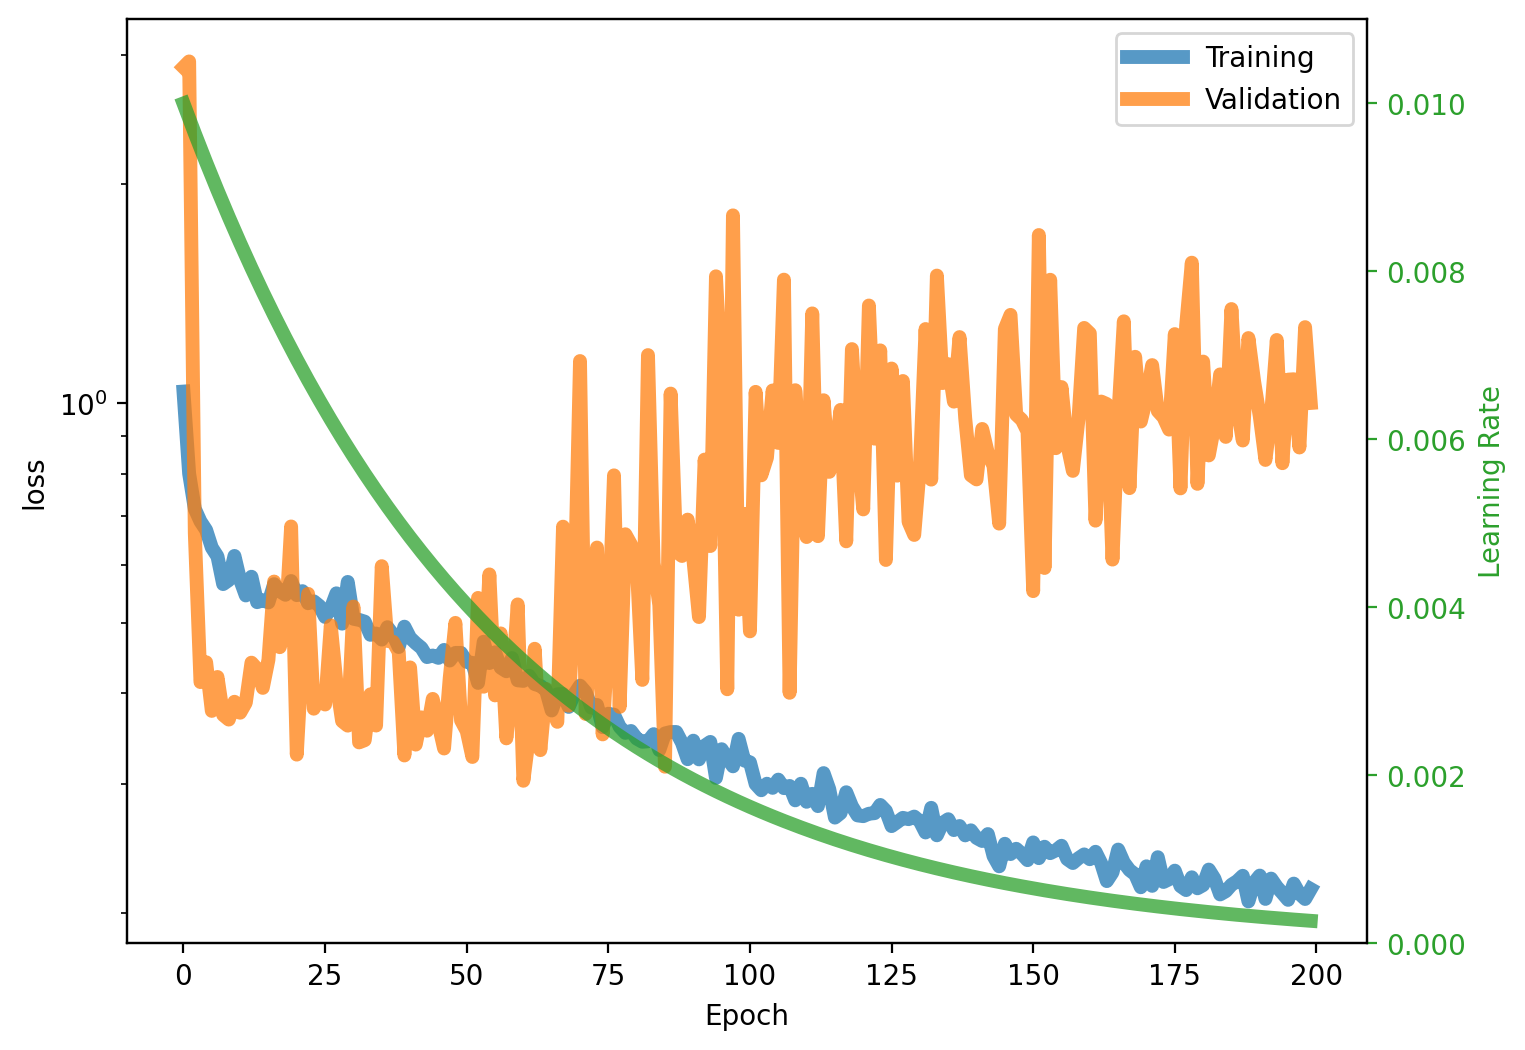

In [7]:
train.lossCurve()

## ParityPlot

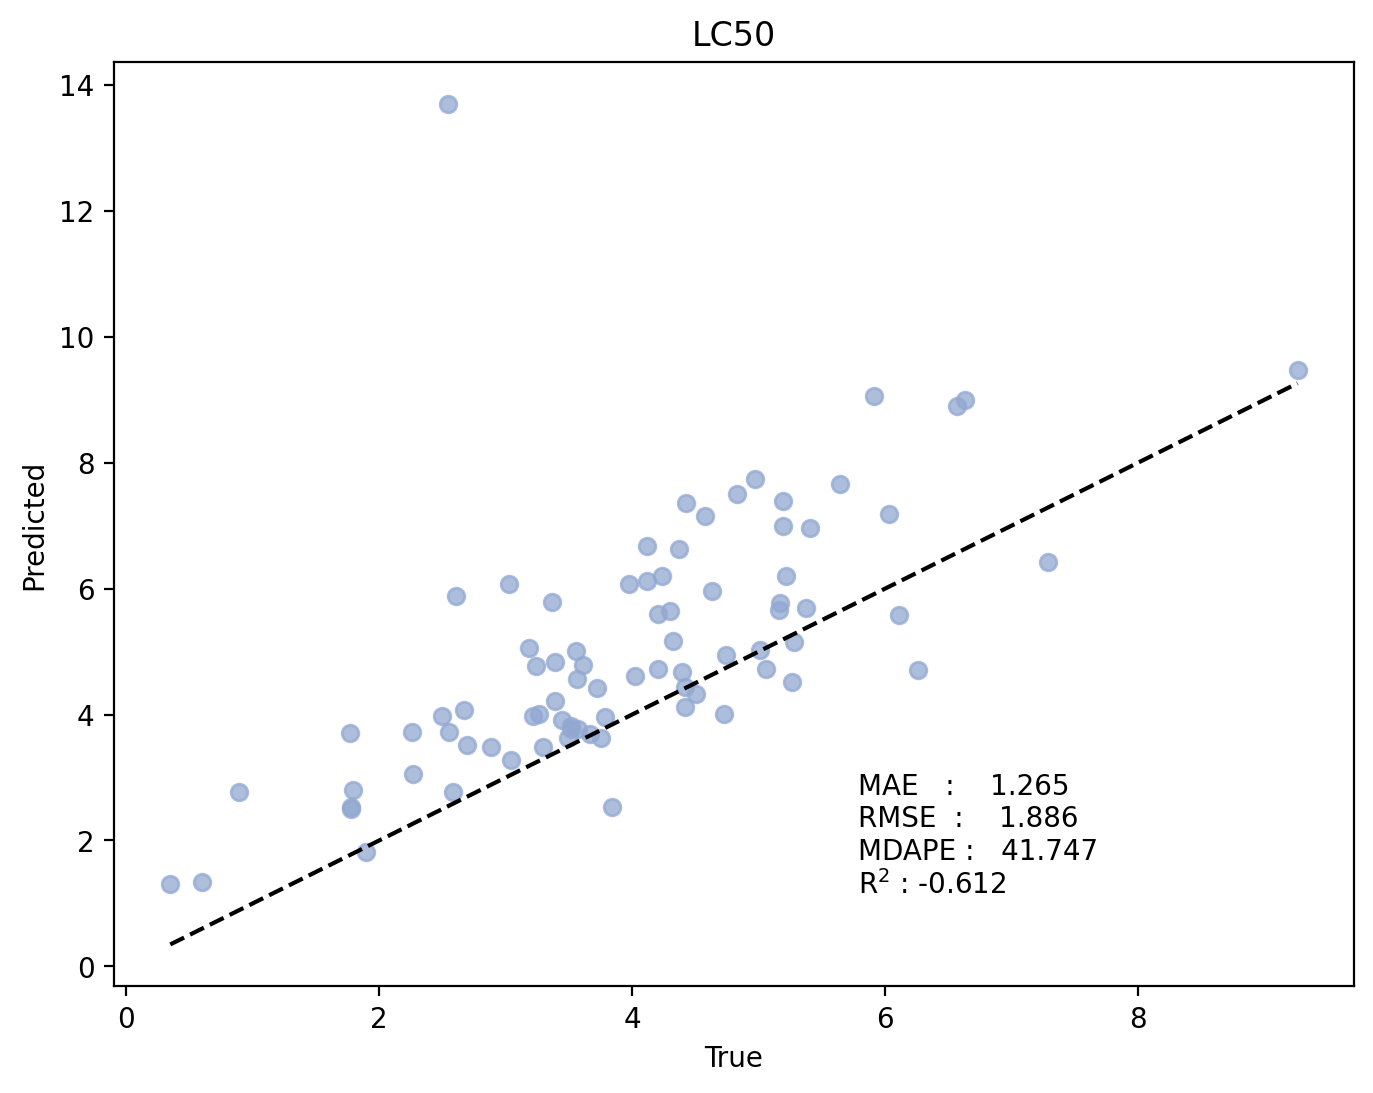

In [8]:
train.TPPlot()

## Nice Plot

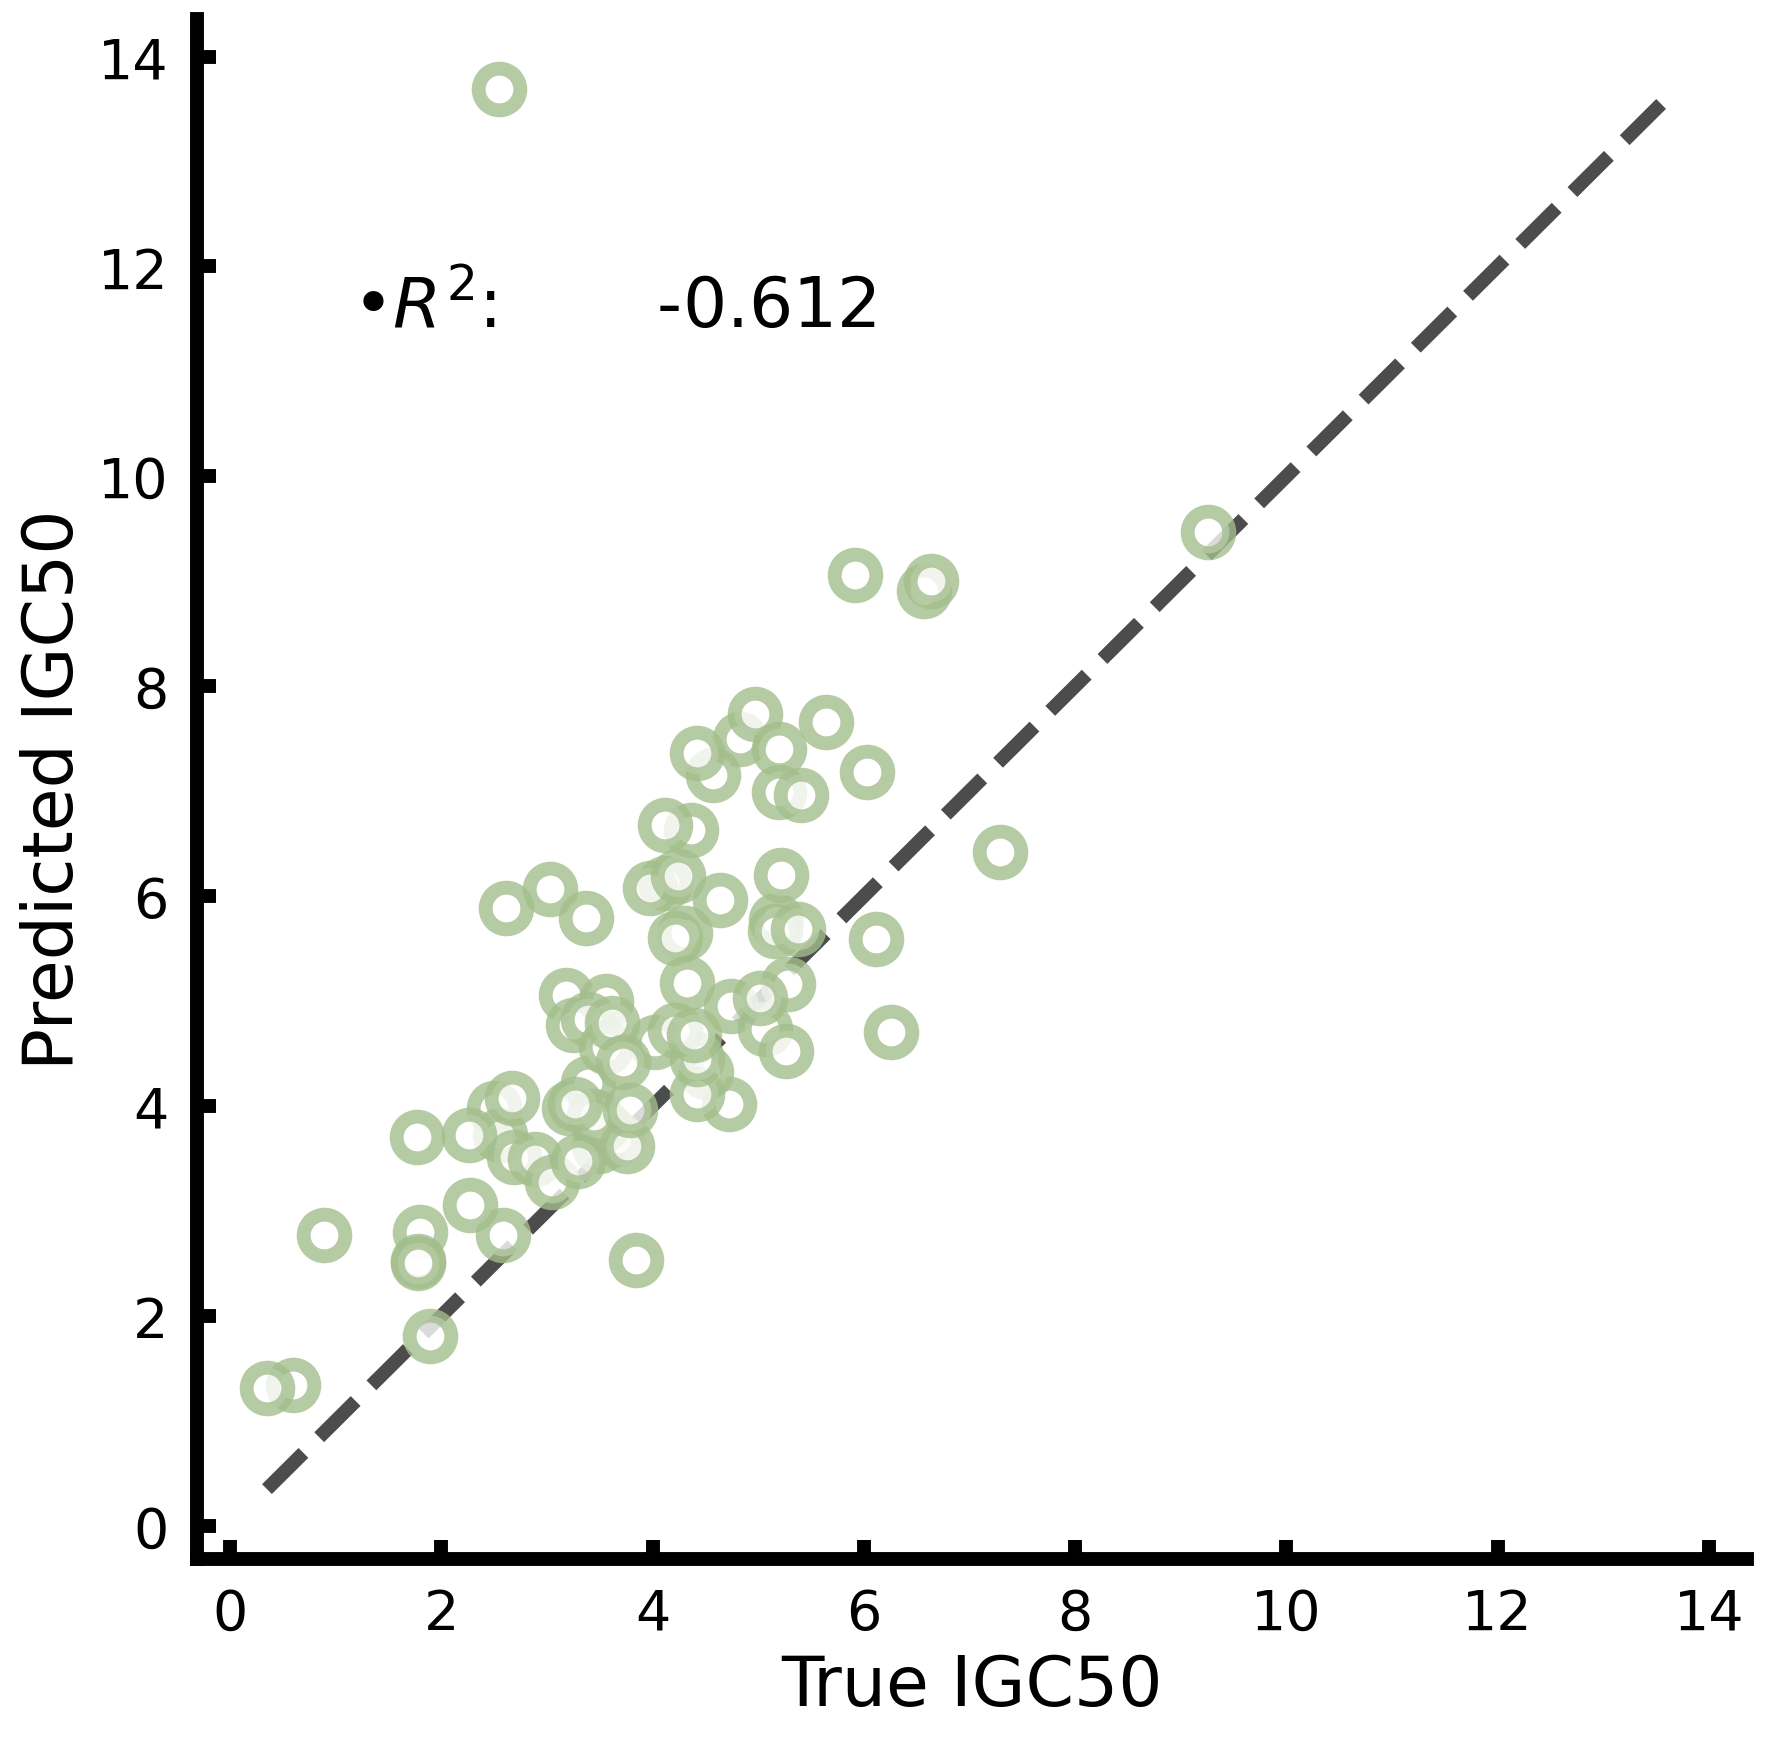

In [9]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 10), dpi = 200)
ax = plt.gca()

true, pred = train.eval(total = False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(5)
ax.spines['left'].set_linewidth(5)
ax.tick_params(labelsize = 20, direction = 'in', width = 5, length = 7, pad = 10)

combined = np.stack([true, pred]).flatten()

ax.plot([combined.min(), combined.max()], [combined.min(), combined.max()], color = 'k', linestyle = '--', linewidth = 5, alpha = 0.7)
ax.plot(true, pred, marker = 'o', markersize = 15, markerfacecolor = '#FFFFFF', markeredgecolor = '#A3BE8C', markeredgewidth = 5, linestyle = 'None', alpha = 0.8)
# ax.plot(true, pred, marker = 'o', markersize = 15, markerfacecolor = '#FFFFFF', markeredgecolor = '#BF616A', markeredgewidth = 5, linestyle = 'None', alpha = 0.8)

annot = "•$R^2$: %12.3f" % train.metrics(true, pred)[-1]
# annot = "•MAE: %8.3f\n•RMSE: %6.3f\n•MAPE: %7.3f%%\n•$R^2$: %12.3f" % train.metrics(true, pred)
ax.annotate(annot, xy = (0.1, 0.8), xycoords = 'axes fraction', fontsize = 25)

# ax.set_xlabel("True Flash Point (K)", fontsize = 25)
# ax.set_ylabel("Predicted Flash Point (K)", fontsize = 25)
ax.set_xlabel("True IGC50", fontsize = 25)
ax.set_ylabel("Predicted IGC50", fontsize = 25)

plt.show()